<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

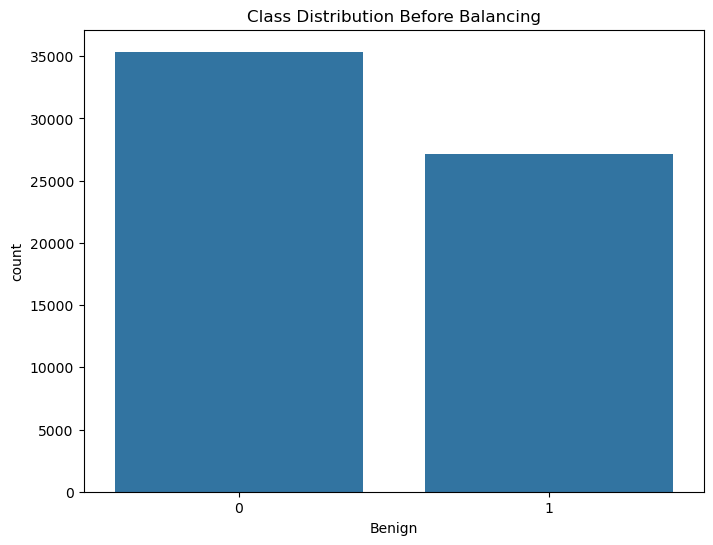

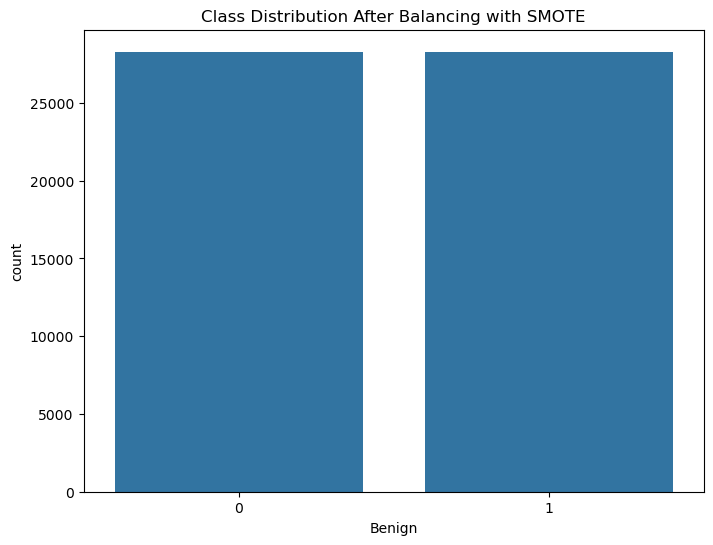

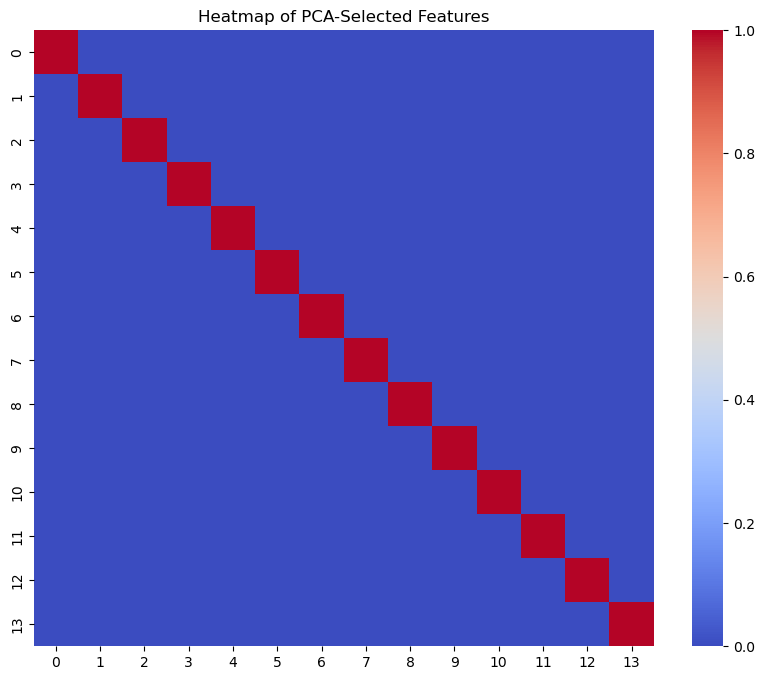

Training and evaluating SVM...

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7073
           1       0.98      0.97      0.97      5424

    accuracy                           0.98     12497
   macro avg       0.98      0.97      0.97     12497
weighted avg       0.98      0.98      0.98     12497



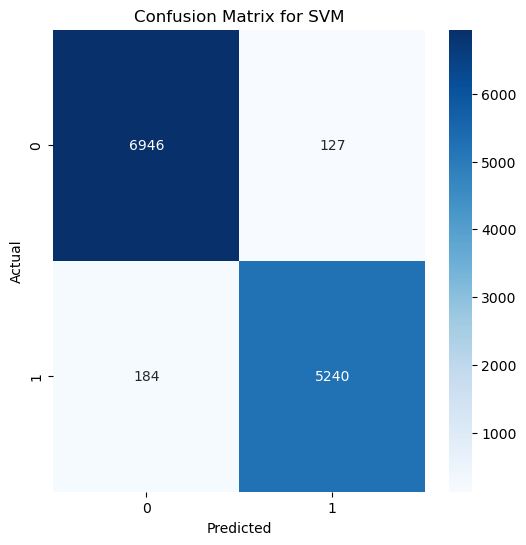

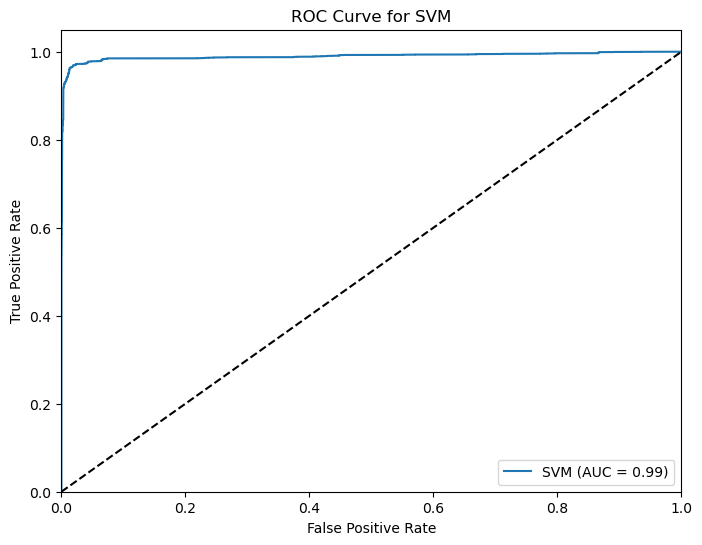

Training and evaluating ANN...

Classification Report for ANN:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7073
           1       0.99      0.99      0.99      5424

    accuracy                           0.99     12497
   macro avg       0.99      0.99      0.99     12497
weighted avg       0.99      0.99      0.99     12497



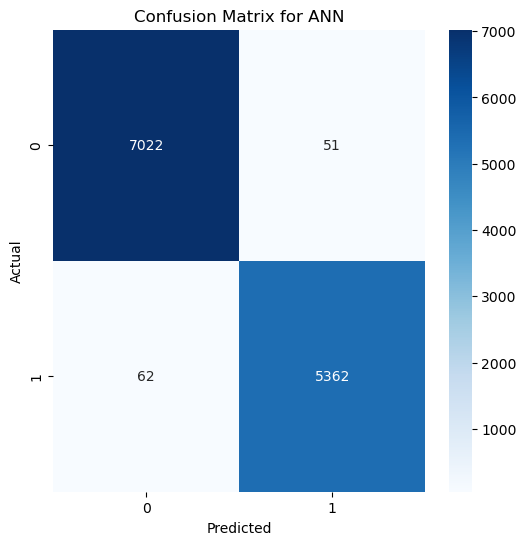

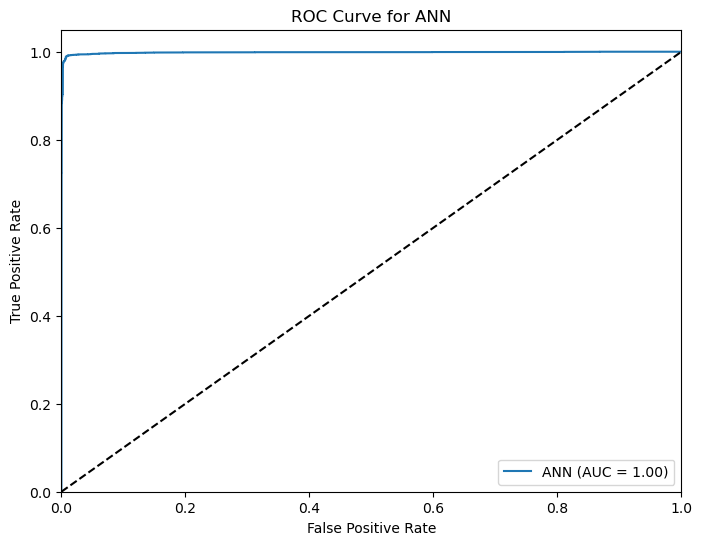

Training and evaluating Random Forest...

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7073
           1       0.99      0.99      0.99      5424

    accuracy                           0.99     12497
   macro avg       0.99      0.99      0.99     12497
weighted avg       0.99      0.99      0.99     12497



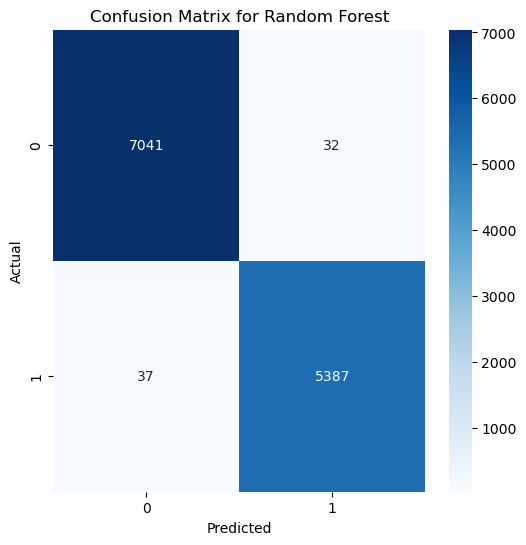

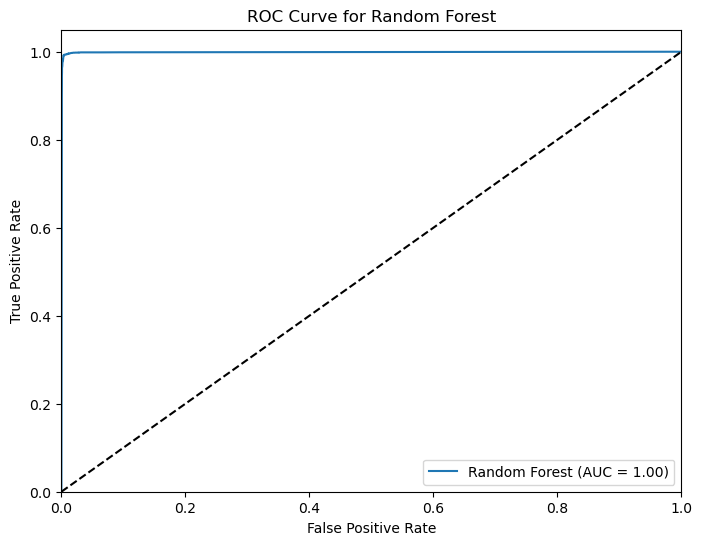

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.pipeline import make_pipeline

# Load the dataset
data_path = "C:/Users/CSE/Desktop/Data/Ransomware/data_file.csv"
data = pd.read_csv(data_path)

# Display basic information about the dataset
print(data.info())
print(data.describe())

# Separate features and target variable
X = data.drop(columns=['FileName', 'md5Hash', 'Benign'])
y = data['Benign']

# Visualize class distribution before balancing
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Class Distribution Before Balancing")
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Visualize class distribution after balancing
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After Balancing with SMOTE")
plt.show()

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for feature selection
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualize the PCA-selected features as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_train_pca).corr(), cmap='coolwarm', annot=False)
plt.title("Heatmap of PCA-Selected Features")
plt.show()

# Define classifiers
svm_classifier = SVC(probability=True, random_state=42)
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

classifiers = {
    "SVM": svm_classifier,
    "ANN": ann_classifier,
    "Random Forest": rf_classifier
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f"Training and evaluating {name}...")
    
    # Train the classifier
    clf.fit(X_train_pca, y_train_resampled)
    
    # Predict on the test set
    y_pred = clf.predict(X_test_pca)
    y_prob = clf.predict_proba(X_test_pca)[:, 1]
    
    # Classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {name}")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# code modified

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

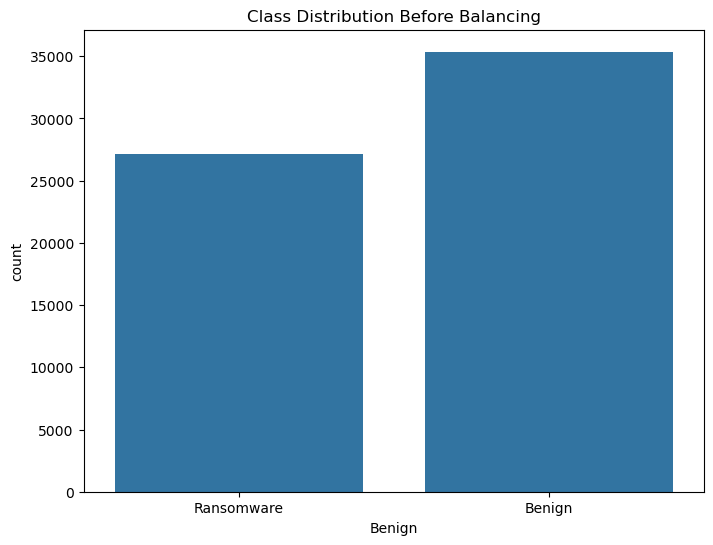

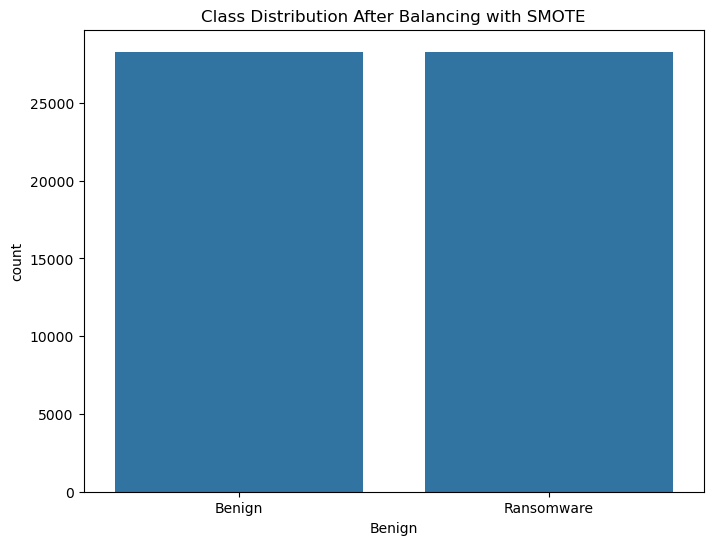

Training and evaluating SVM...

Classification Report for SVM:
              precision    recall  f1-score   support

      Benign       0.97      0.98      0.98      7073
  Ransomware       0.98      0.97      0.97      5424

    accuracy                           0.98     12497
   macro avg       0.98      0.97      0.97     12497
weighted avg       0.98      0.98      0.98     12497



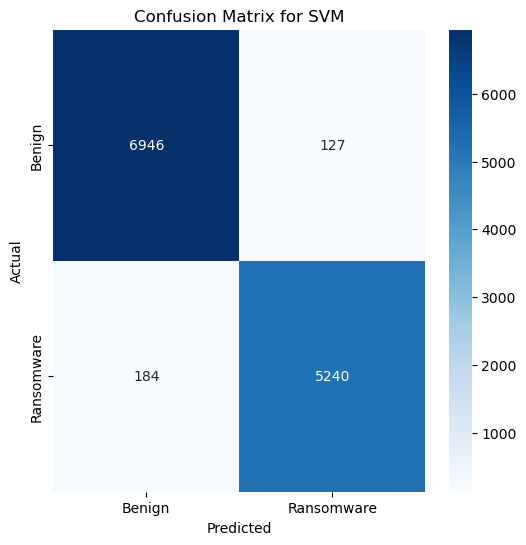

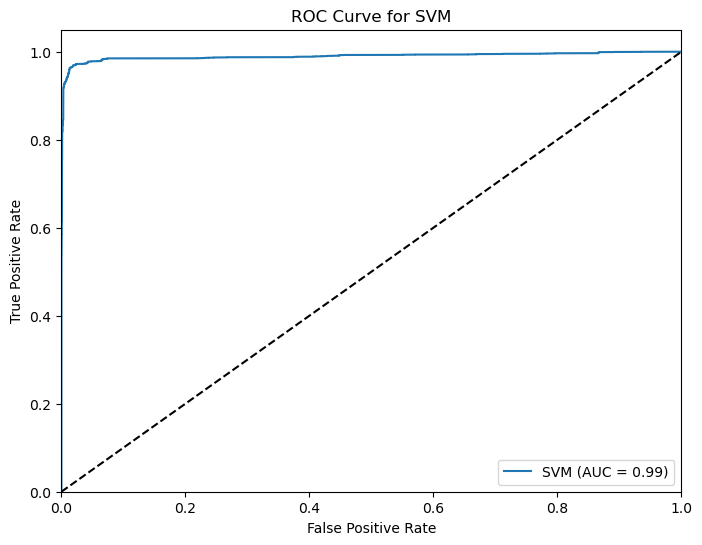

Training and evaluating ANN...

Classification Report for ANN:
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99      7073
  Ransomware       0.99      0.99      0.99      5424

    accuracy                           0.99     12497
   macro avg       0.99      0.99      0.99     12497
weighted avg       0.99      0.99      0.99     12497



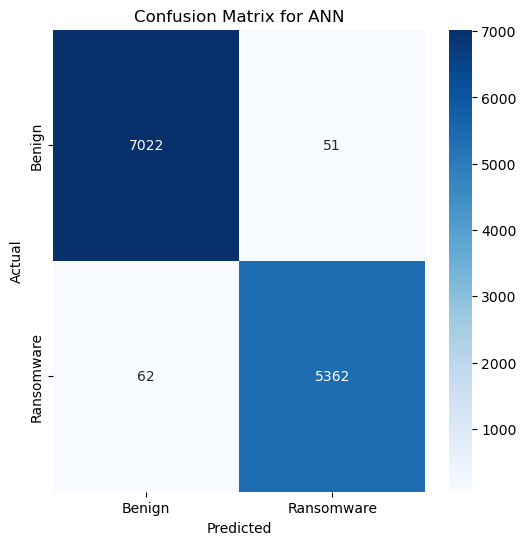

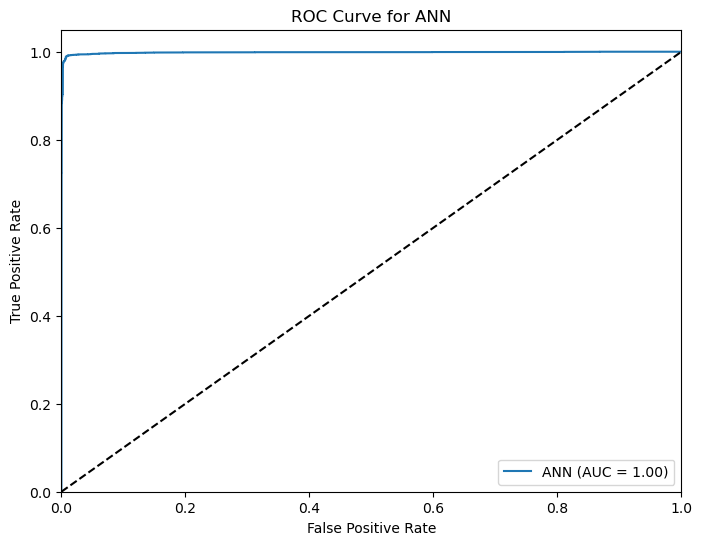

Training and evaluating Random Forest...

Classification Report for Random Forest:
              precision    recall  f1-score   support

      Benign       0.99      1.00      1.00      7073
  Ransomware       0.99      0.99      0.99      5424

    accuracy                           0.99     12497
   macro avg       0.99      0.99      0.99     12497
weighted avg       0.99      0.99      0.99     12497



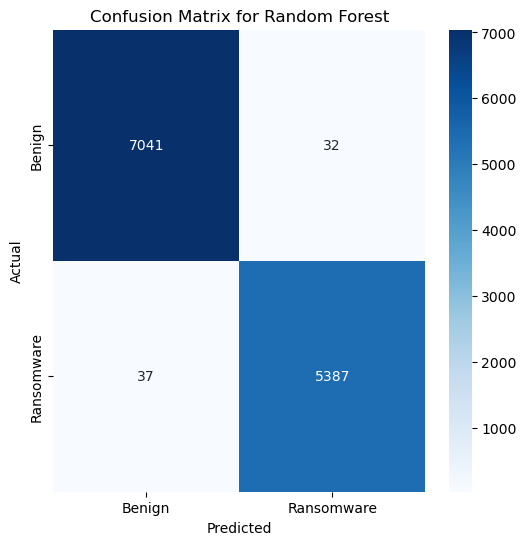

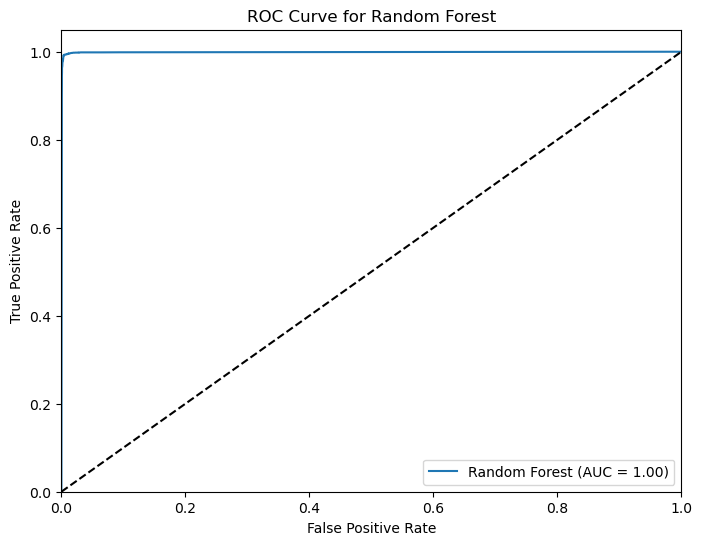

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

# Load the dataset
data_path = "C:/Users/CSE/Desktop/Data/Ransomware/data_file.csv"
data = pd.read_csv(data_path)

# Display basic information about the dataset
print(data.info())
print(data.describe())

# Define the relevant numerical features for analysis
relevant_features = [
    'Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion',
    'ExportRVA', 'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion',
    'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize',
    'BitcoinAddresses'
]

# Separate features and target variable
X = data[relevant_features]  # Use only the relevant numerical features
y = data['Benign']  # Target variable

# Map the binary labels to meaningful names
label_mapping = {0: "Benign", 1: "Ransomware"}
y = y.map(label_mapping)  # Replace 0 with "Benign" and 1 with "Ransomware"

# Visualize class distribution before balancing
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Class Distribution Before Balancing")
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE (revert labels to numeric for SMOTE)
y_train_numeric = y_train.map({v: k for k, v in label_mapping.items()})  # Convert back to numeric
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled_numeric = smote.fit_resample(X_train, y_train_numeric)

# Map the resampled labels back to meaningful names
y_train_resampled = y_train_resampled_numeric.map(label_mapping)

# Visualize class distribution after balancing
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After Balancing with SMOTE")
plt.show()

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for feature selection
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define classifiers
svm_classifier = SVC(probability=True, random_state=42)
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifiers = {
    "SVM": svm_classifier,
    "ANN": ann_classifier,
    "Random Forest": rf_classifier
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f"Training and evaluating {name}...")

    # Train the classifier
    clf.fit(X_train_pca, y_train_resampled)

    # Predict on the test set
    y_pred = clf.predict(X_test_pca)
    y_prob = clf.predict_proba(X_test_pca)[:, 1]  # Probability of "Ransomware" (class 1)

    # Classification report with meaningful labels
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=["Benign", "Ransomware"]))

    # Confusion matrix with meaningful labels
    cm = confusion_matrix(y_test, y_pred, labels=["Benign", "Ransomware"])
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Ransomware"], yticklabels=["Benign", "Ransomware"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC curve with meaningful labels
    fpr, tpr, _ = roc_curve(y_test.map({v: k for k, v in label_mapping.items()}), y_prob)  # Convert labels back to numeric for ROC
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {name}")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Benchmark Implementation

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import re

# Load the dataset
data_path = "C:/Users/CSE/Desktop/Data/Ransomware/data_file.csv"
data = pd.read_csv(data_path)

# Display basic information about the dataset
print(data.info())
print(data.describe())

# Define the relevant numerical features for analysis
relevant_features = [
    'Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion',
    'ExportRVA', 'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion',
    'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize'
]

# Assume 'BitcoinAddresses' contains text data for TF-IDF
text_feature = 'BitcoinAddresses'

# Preprocess the text feature
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', str(text)).lower()
    return text.strip()

data[text_feature] = data[text_feature].apply(clean_text).fillna("missing")

# Check for edge cases
if len(data[text_feature].unique()) == 1:
    raise ValueError(f"The '{text_feature}' column contains identical values. TF-IDF cannot be applied.")

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stopwords_set = set(ENGLISH_STOP_WORDS)

all_stopwords_or_empty = all(
    set(value.split()).issubset(stopwords_set) or value == "missing"
    for value in data[text_feature]
)
if all_stopwords_or_empty:
    raise ValueError(f"The '{text_feature}' column contains only stopwords or empty strings. TF-IDF cannot be applied.")

# Separate features and target variable
X_numeric = data[relevant_features]  # Numerical features
X_text = data[text_feature]          # Text feature for TF-IDF
y = data['Benign']                   # Target variable

# Map the binary labels to meaningful names
label_mapping = {0: "Benign", 1: "Ransomware"}
y = y.map(label_mapping)  # Replace 0 with "Benign" and 1 with "Ransomware"

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

# Split the dataset into training and testing sets
X_numeric_train, X_numeric_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_numeric, X_text, y, test_size=0.2, random_state=42, stratify=y
)

# Apply TF-IDF to the text feature
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')  # Exclude common English stop words
try:
    X_text_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train).toarray()
    X_text_test_tfidf = tfidf_vectorizer.transform(X_text_test).toarray()
    
    # Check the vocabulary to ensure it is not empty
    if len(tfidf_vectorizer.vocabulary_) == 0:
        raise ValueError("TF-IDF vocabulary is empty. Ensure the text data contains meaningful terms.")
except ValueError as e:
    print(f"TF-IDF failed: {e}")
    print("Inspect the 'BitcoinAddresses' column for issues.")
    print("Unique values:", data[text_feature].unique())

# Combine numerical and TF-IDF features
X_train_combined = np.hstack((X_numeric_train.values, X_text_train_tfidf))
X_test_combined = np.hstack((X_numeric_test.values, X_text_test_tfidf))

# Standardize the combined features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

# Define classifiers
svm_classifier = SVC(probability=True, random_state=42)
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifiers = {
    "SVM": svm_classifier,
    "ANN": ann_classifier,
    "Random Forest": rf_classifier
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f"Training and evaluating {name}...")

    # Train the classifier
    clf.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test_scaled)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]  # Probability of "Ransomware" (class 1)

    # Classification report with meaningful labels
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=["Benign", "Ransomware"]))

    # Confusion matrix with meaningful labels
    cm = confusion_matrix(y_test, y_pred, labels=["Benign", "Ransomware"])
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Ransomware"], yticklabels=["Benign", "Ransomware"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC curve with meaningful labels
    fpr, tpr, _ = roc_curve(y_test.map({v: k for k, v in label_mapping.items()}), y_prob)  # Convert labels back to numeric for ROC
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {name}")
    plt.legend(loc="lower right")
    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

ValueError: The 'BitcoinAddresses' column contains identical values. TF-IDF cannot be applied.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinA

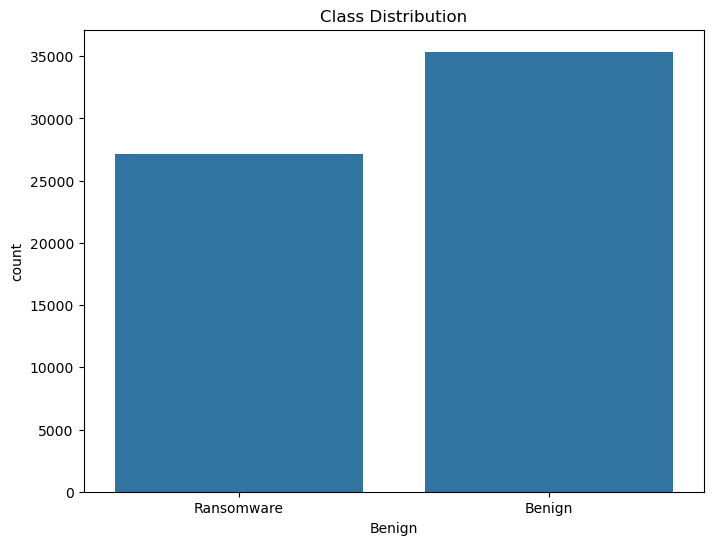


Sample of X_text_train:
56456    0
60561    0
57974    0
20553    0
30143    0
52120    0
22060    0
51856    0
51279    0
5720     0
Name: BitcoinAddresses, dtype: object
Unique values in X_text_train: 2
Error during TF-IDF transformation: empty vocabulary; perhaps the documents only contain stop words
Falling back to numeric features only.

Training and evaluating SVM...

Classification Report for SVM:
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98      7073
  Ransomware       0.98      0.97      0.97      5424

    accuracy                           0.98     12497
   macro avg       0.98      0.98      0.98     12497
weighted avg       0.98      0.98      0.98     12497



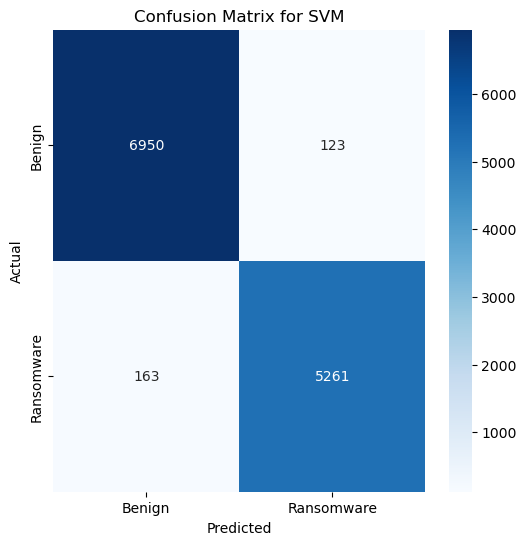

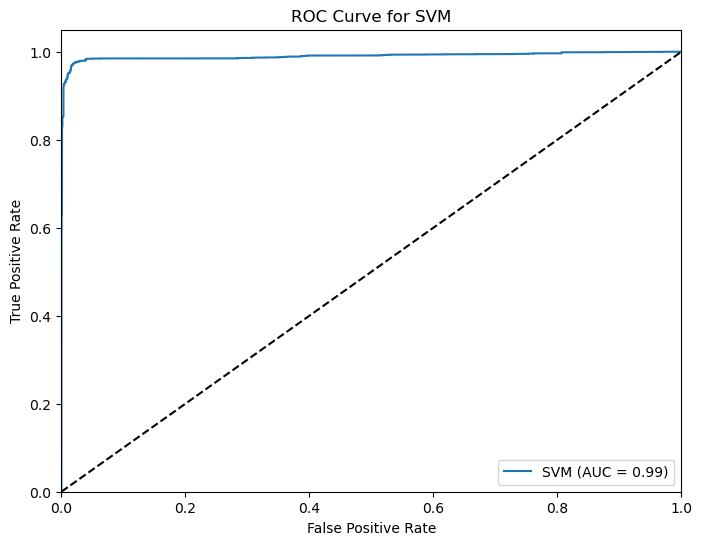


Training and evaluating ANN...

Classification Report for ANN:
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99      7073
  Ransomware       0.99      0.99      0.99      5424

    accuracy                           0.99     12497
   macro avg       0.99      0.99      0.99     12497
weighted avg       0.99      0.99      0.99     12497



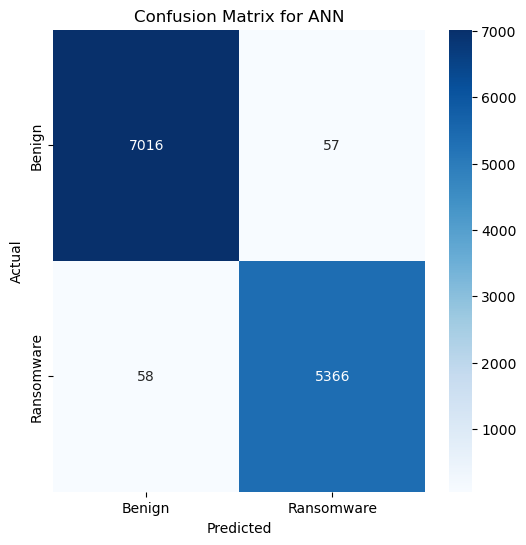

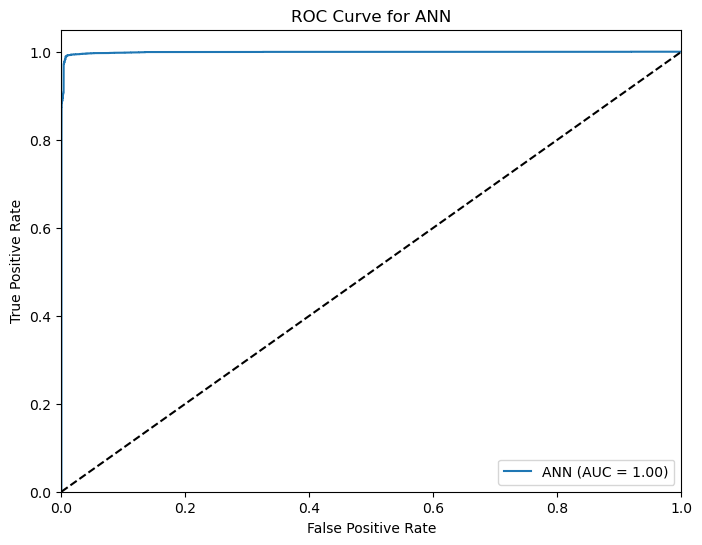


Training and evaluating Random Forest...

Classification Report for Random Forest:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      7073
  Ransomware       1.00      0.99      1.00      5424

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



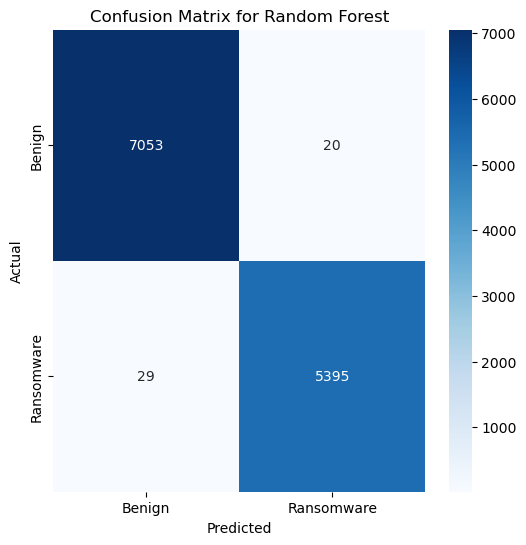

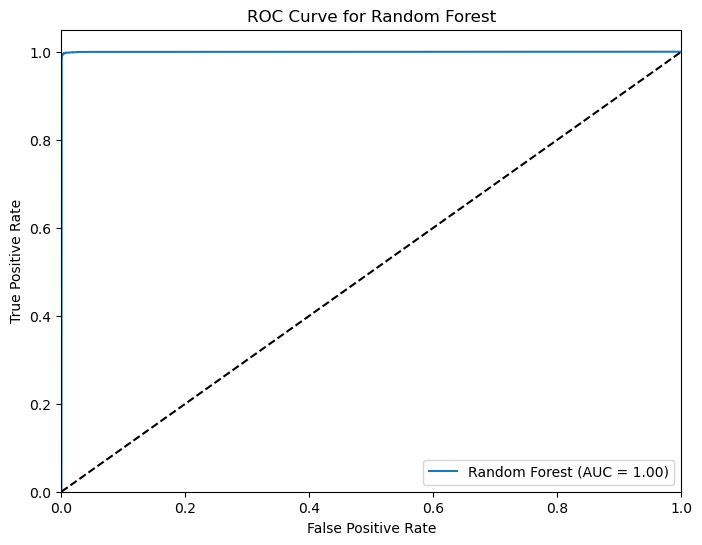

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import re

# Load the dataset
data_path = "C:/Users/CSE/Desktop/Data/Ransomware/data_file.csv"
data = pd.read_csv(data_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())

# Define the relevant numerical features for analysis
relevant_features = [
    'Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion',
    'ExportRVA', 'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion',
    'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize'
]

# Text feature for TF-IDF
text_feature = 'BitcoinAddresses'

# Preprocess the text data (lighter preprocessing for Bitcoin addresses)
def preprocess_text(text):
    return str(text).strip()  # Convert to string and remove extra whitespace

# Apply preprocessing and handle missing values
data[text_feature] = data[text_feature].fillna("missing").apply(preprocess_text)

# Inspect raw and preprocessed text data
print("\nRaw BitcoinAddresses sample:")
print(data[text_feature].head(10))
print("Missing values in BitcoinAddresses:", data[text_feature].isna().sum())
print("Unique values in BitcoinAddresses:", len(data[text_feature].unique()))

# Separate features and target variable
X_numeric = data[relevant_features]  # Numerical features
X_text = data[text_feature]          # Text feature for TF-IDF
y = data['Benign']                   # Target variable

# Map binary labels to meaningful names
label_mapping = {0: "Benign", 1: "Ransomware"}
y = y.map(label_mapping)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

# Split the dataset into training and testing sets
X_numeric_train, X_numeric_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_numeric, X_text, y, test_size=0.2, random_state=42, stratify=y
)

# Check text data before TF-IDF
print("\nSample of X_text_train:")
print(X_text_train.head(10))
print("Unique values in X_text_train:", len(X_text_train.unique()))

# Apply TF-IDF to the text feature with fallback
tfidf_vectorizer = TfidfVectorizer(max_features=100, min_df=1, stop_words=None)
try:
    X_text_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train).toarray()
    X_text_test_tfidf = tfidf_vectorizer.transform(X_text_test).toarray()
    print("TF-IDF Vocabulary size:", len(tfidf_vectorizer.vocabulary_))
    print("Sample vocabulary:", list(tfidf_vectorizer.vocabulary_.items())[:5])
except ValueError as e:
    print(f"Error during TF-IDF transformation: {e}")
    print("Falling back to numeric features only.")
    X_text_train_tfidf = np.zeros((X_numeric_train.shape[0], 1))  # Dummy array
    X_text_test_tfidf = np.zeros((X_numeric_test.shape[0], 1))    # Dummy array

# Combine numerical and TF-IDF features
X_train_combined = np.hstack((X_numeric_train.values, X_text_train_tfidf))
X_test_combined = np.hstack((X_numeric_test.values, X_text_test_tfidf))

# Standardize the combined features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

# Define classifiers
svm_classifier = SVC(probability=True, random_state=42)
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifiers = {
    "SVM": svm_classifier,
    "ANN": ann_classifier,
    "Random Forest": rf_classifier
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f"\nTraining and evaluating {name}...")

    # Train the classifier
    clf.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test_scaled)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]  # Probability of "Ransomware"

    # Classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=["Benign", "Ransomware"]))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=["Benign", "Ransomware"])
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Benign", "Ransomware"], yticklabels=["Benign", "Ransomware"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test.map({"Benign": 0, "Ransomware": 1}), y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {name}")
    plt.legend(loc="lower right")
    plt.show()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinA

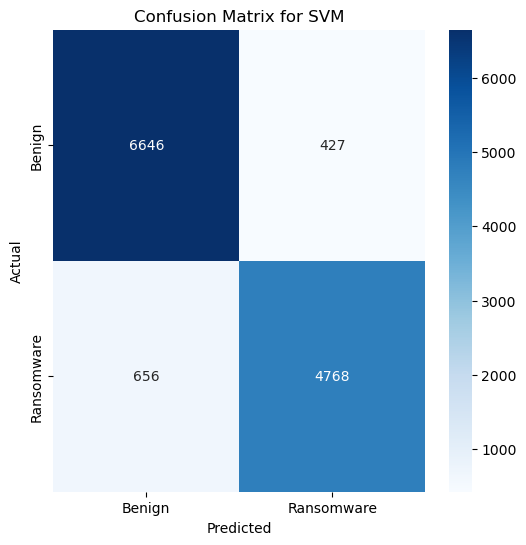


Training and evaluating ANN...


C:\Users\CSE\anaconda3\envs\lexenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Classification Report for ANN:
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99      7073
  Ransomware       0.98      0.98      0.98      5424

    accuracy                           0.99     12497
   macro avg       0.99      0.98      0.98     12497
weighted avg       0.99      0.99      0.99     12497



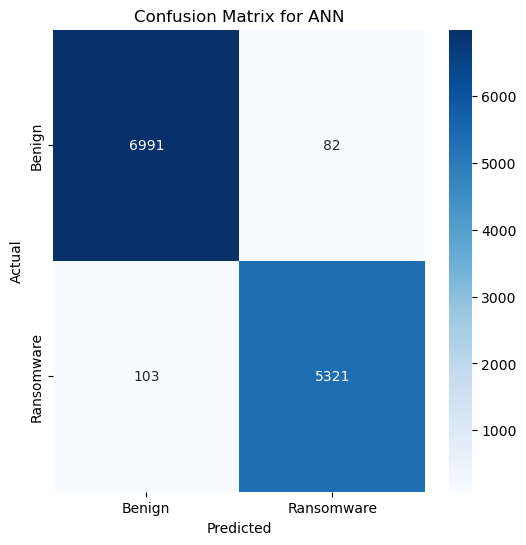


Training and evaluating Random Forest...

Classification Report for Random Forest:
              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99      7073
  Ransomware       1.00      0.99      0.99      5424

    accuracy                           0.99     12497
   macro avg       0.99      0.99      0.99     12497
weighted avg       0.99      0.99      0.99     12497



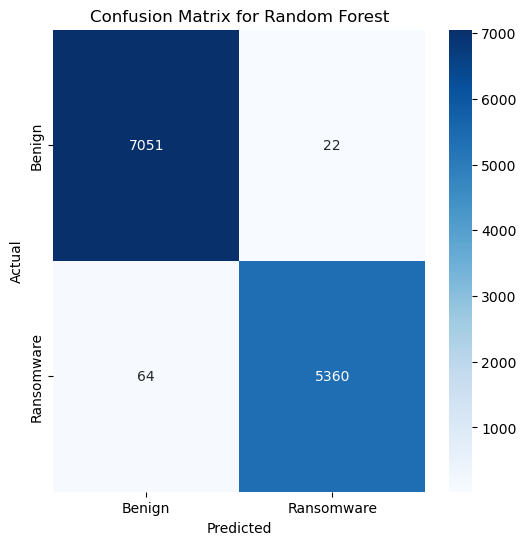

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data_path = "C:/Users/CSE/Desktop/Data/Ransomware/data_file.csv"
data = pd.read_csv(data_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

# Define the relevant numerical features for analysis
relevant_features = [
    'Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion',
    'ExportRVA', 'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion',
    'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize'
]

# Text feature for TF-IDF
text_feature = 'BitcoinAddresses'

# Preprocess the text data (minimal preprocessing)
def preprocess_text(text):
    return str(text).strip()  # Convert to string and remove extra whitespace

# Apply preprocessing and handle missing values
data[text_feature] = data[text_feature].fillna("missing").apply(preprocess_text)

# Separate features and target variable
X_numeric = data[relevant_features]  # Numerical features
X_text = data[text_feature]          # Text feature for TF-IDF
y = data['Benign']                   # Target variable

# Map binary labels to meaningful names
label_mapping = {0: "Benign", 1: "Ransomware"}
y = y.map(label_mapping)

# Split the dataset into training and testing sets
X_numeric_train, X_numeric_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_numeric, X_text, y, test_size=0.2, random_state=42, stratify=y
)

# Apply TF-IDF with lower parameters
tfidf_vectorizer = TfidfVectorizer(max_features=20, min_df=1, stop_words=None)  # Reduced to 20 features
try:
    X_text_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train).toarray()
    X_text_test_tfidf = tfidf_vectorizer.transform(X_text_test).toarray()
    print("TF-IDF Vocabulary size:", len(tfidf_vectorizer.vocabulary_))
except ValueError as e:
    print(f"Error during TF-IDF transformation: {e}")
    print("Falling back to numeric features only.")
    X_text_train_tfidf = np.zeros((X_numeric_train.shape[0], 1))  # Dummy array
    X_text_test_tfidf = np.zeros((X_numeric_test.shape[0], 1))    # Dummy array

# Combine numerical and TF-IDF features
X_train_combined = np.hstack((X_numeric_train.values, X_text_train_tfidf))
X_test_combined = np.hstack((X_numeric_test.values, X_text_test_tfidf))

# Standardize the combined features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

# Define classifiers with reduced complexity
svm_classifier = SVC(kernel='linear', random_state=42)  # Simpler linear kernel, no probability
ann_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=42)  # Smaller network, fewer iterations
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)  # Fewer trees, limited depth
classifiers = {
    "SVM": svm_classifier,
    "ANN": ann_classifier,
    "Random Forest": rf_classifier
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f"\nTraining and evaluating {name}...")

    # Train the classifier
    clf.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test_scaled)

    # Classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=["Benign", "Ransomware"]))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=["Benign", "Ransomware"])
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Benign", "Ransomware"], yticklabels=["Benign", "Ransomware"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinA

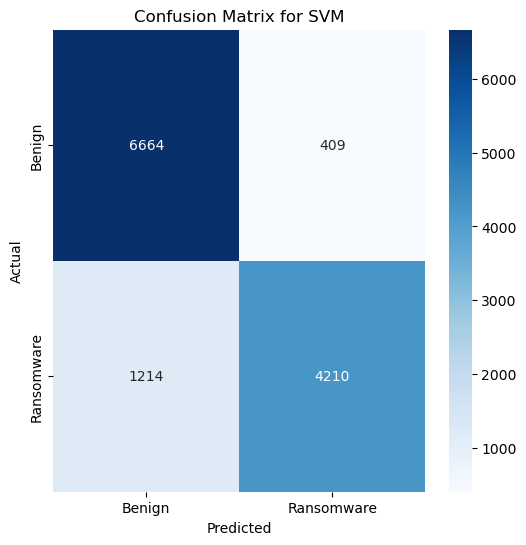

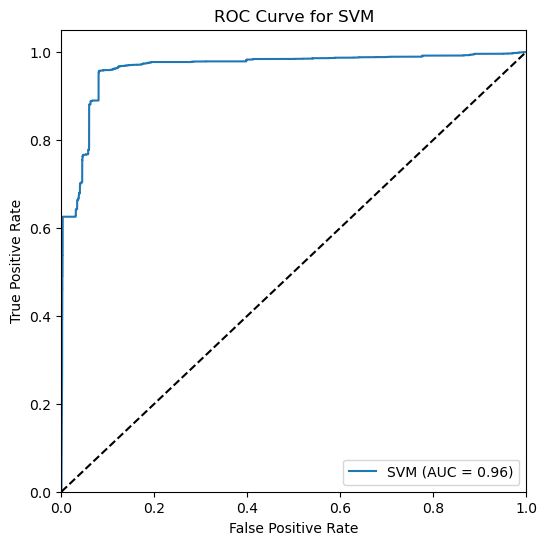


Training and evaluating ANN...


C:\Users\CSE\anaconda3\envs\lexenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Classification Report for ANN:
              precision    recall  f1-score   support

      Benign       0.98      0.99      0.98      7073
  Ransomware       0.98      0.97      0.98      5424

    accuracy                           0.98     12497
   macro avg       0.98      0.98      0.98     12497
weighted avg       0.98      0.98      0.98     12497



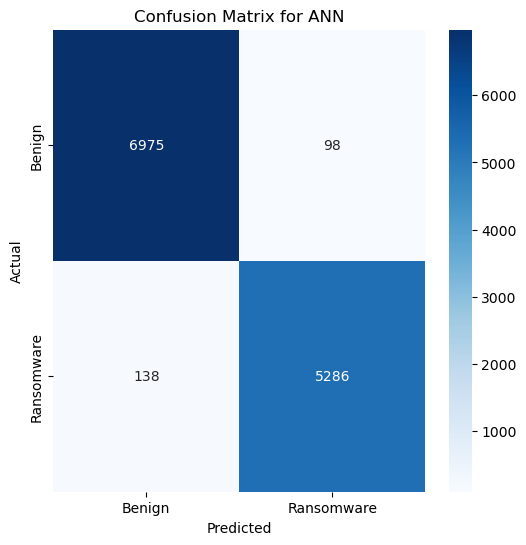

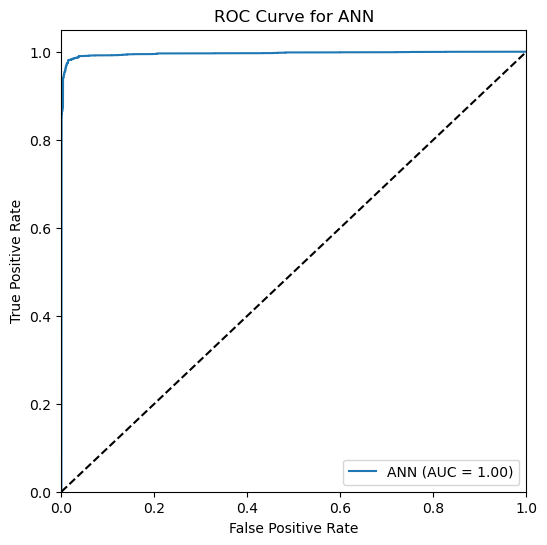


Training and evaluating Random Forest...

Classification Report for Random Forest:
              precision    recall  f1-score   support

      Benign       0.98      0.99      0.98      7073
  Ransomware       0.99      0.97      0.98      5424

    accuracy                           0.98     12497
   macro avg       0.98      0.98      0.98     12497
weighted avg       0.98      0.98      0.98     12497



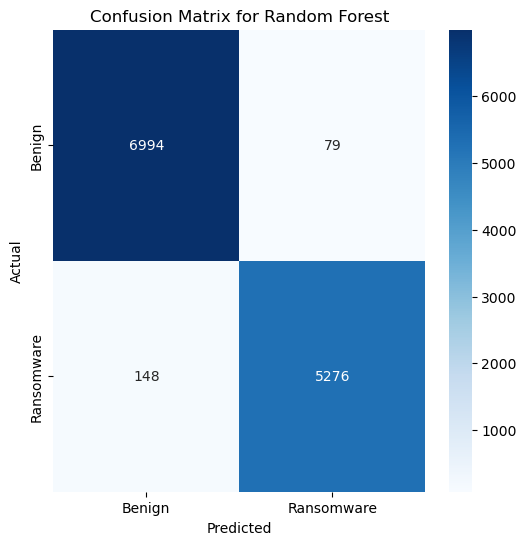

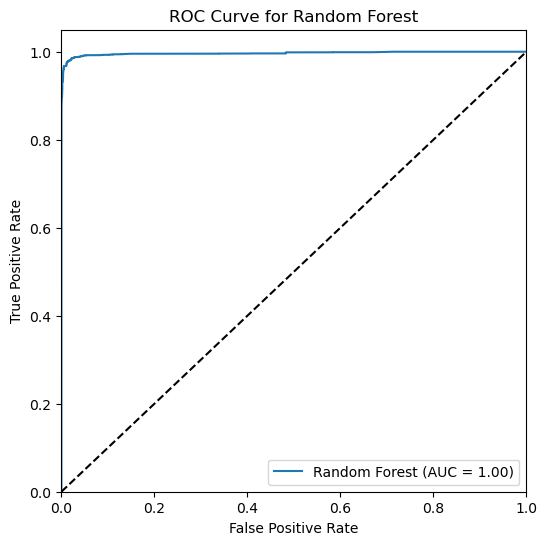

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load the dataset
data_path = "C:/Users/CSE/Desktop/Data/Ransomware/data_file.csv"
data = pd.read_csv(data_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

# Define the relevant numerical features for analysis
relevant_features = [
    'Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion',
    'ExportRVA', 'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion',
    'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize'
]

# Text feature for TF-IDF
text_feature = 'BitcoinAddresses'

# Preprocess the text data (minimal preprocessing)
def preprocess_text(text):
    return str(text).strip()  # Convert to string and remove extra whitespace

# Apply preprocessing and handle missing values
data[text_feature] = data[text_feature].fillna("missing").apply(preprocess_text)

# Separate features and target variable
X_numeric = data[relevant_features]  # Numerical features
X_text = data[text_feature]          # Text feature for TF-IDF
y = data['Benign']                   # Target variable

# Map binary labels to meaningful names
label_mapping = {0: "Benign", 1: "Ransomware"}
y = y.map(label_mapping)

# Split the dataset into training and testing sets
X_numeric_train, X_numeric_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_numeric, X_text, y, test_size=0.2, random_state=42, stratify=y
)

# Apply TF-IDF with lower parameters
tfidf_vectorizer = TfidfVectorizer(max_features=20, min_df=1, stop_words=None)  # Reduced to 20 features
try:
    X_text_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train).toarray()
    X_text_test_tfidf = tfidf_vectorizer.transform(X_text_test).toarray()
    print("TF-IDF Vocabulary size:", len(tfidf_vectorizer.vocabulary_))
except ValueError as e:
    print(f"Error during TF-IDF transformation: {e}")
    print("Falling back to numeric features only.")
    X_text_train_tfidf = np.zeros((X_numeric_train.shape[0], 1))  # Dummy array
    X_text_test_tfidf = np.zeros((X_numeric_test.shape[0], 1))    # Dummy array

# Combine numerical and TF-IDF features
X_train_combined = np.hstack((X_numeric_train.values, X_text_train_tfidf))
X_test_combined = np.hstack((X_numeric_test.values, X_text_test_tfidf))

# Standardize the combined features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

# Define classifiers with reduced complexity
svm_classifier = SVC(kernel='linear', probability=True, random_state=42, C=0.1)  # Linear kernel, lower C for simplicity
ann_classifier = MLPClassifier(hidden_layer_sizes=(20,), max_iter=100, random_state=42)  # Smaller network, fewer iterations
rf_classifier = RandomForestClassifier(n_estimators=30, max_depth=5, random_state=42)  # Fewer trees, shallower depth
classifiers = {
    "SVM": svm_classifier,
    "ANN": ann_classifier,
    "Random Forest": rf_classifier
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f"\nTraining and evaluating {name}...")

    # Train the classifier
    clf.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test_scaled)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]  # Probability of "Ransomware"

    # Classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=["Benign", "Ransomware"]))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=["Benign", "Ransomware"])
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Benign", "Ransomware"], yticklabels=["Benign", "Ransomware"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test.map({"Benign": 0, "Ransomware": 1}), y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {name}")
    plt.legend(loc="lower right")
    plt.show()